In [76]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
personal_access_token = '3IBH24HXMG4HHAXM77ZW5RRFDYYQWLUE'
http_url = 'https://api.ouraring.com/v2/usercollection/personal_info'

In [73]:
def request_flat_data(data_type: str,
                      personal_access_token: str,
                      start_date: str,
                      end_date: str):

    if data_type in ['daily_sleep', 'daily_activity', 'daily_readiness']:
        print(f'Requesting flat {data_type} data... ', end='')
        url = f'https://api.ouraring.com/v2/usercollection/{data_type}'
    else:
        print('Invalid data type. Please choose one from: daily_sleep, daily_activity, '
              'daily_readiness')
        return

    params = {
        'start_date': f'{start_date}',
        'end_date': f'{end_date}'
    }

    headers = {
        'Authorization': f'Bearer {personal_access_token}'
    }

    response = requests.request('GET', url, headers=headers, params=params, timeout=10)

    response_json = response.json()['data']
    response_df = pd.DataFrame.from_dict(response_json, orient='columns')

    # Expand the 'contributors' column into separate columns
    contributors_df = pd.DataFrame(response_df['contributors'].values.tolist())
    contributors_df.columns = 'contributors.' + contributors_df.columns

    # Concatenate the original DataFrame with the expanded 'contributors' DataFrame
    result_df = pd.concat([response_df.drop(columns=['contributors']), contributors_df], axis=1)

    print('done!')

    return result_df

In [74]:
def request_user_info(personal_access_token: str):
    url = http_url

    headers = {
        'Authorization': f'Bearer {personal_access_token}'
    }

    user_info = requests.request('GET', url, headers=headers, timeout=10)



def request_data(data_type: str,
                 personal_access_token: str,
                 start_date: str,
                 end_date: str):

    if data_type in ['sleep', 'daily_sleep', 'daily_activity', 'daily_readiness', 'sleep_time',
                     'tag', 'workout', 'session', 'daily_spo2', 'heartrate', 'rest_mode_period']:
        print(f'Requesting {data_type} data... ', end='')
        url = f'https://api.ouraring.com/v2/usercollection/{data_type}'
    else:
        print('Invalid data type. Please choose one from: sleep, daily_sleep, daily_activity, '
              'daily_readiness, sleep_time, tag, workout, session, daily_spo2, heartrate, '
              'rest_mode_period')
        return

    params = {
        'start_date': f'{start_date}',
        'end_date': f'{end_date}'
    }

    headers = {
        'Authorization': f'Bearer {personal_access_token}'
    }

    response = requests.request('GET', url, headers=headers, params=params, timeout=10)

    response_json = response.json()['data']
    response_df = pd.DataFrame.from_dict(response_json, orient='columns')

    print('done!')

    return response_df

In [ ]:
#Oura cloud API
import os
from oura import OuraClient
my_token = os.getenv('3IBH24HXMG4HHAXM77ZW5RRFDYYQWLUE')
client = OuraClient(personal_access_token=my_token)
if client is not None: 
    print("Oura API Client successfull..")

In [8]:
listdir('Data')

['oura_heartrate.json',
 'oura_activities.json',
 'oura_2022-03-15T09-41-37.json']

In [9]:
with open('Data/oura_activities.json') as activities_file:
    data = json.load(activities_file)
    sleep_df = pd.DataFrame.from_dict(data['sleep'])
    print(sleep_df.shape, "sleep_df.columns:",sleep_df.columns)
    activity_df = pd.DataFrame.from_dict(data['activity'])
    print(activity_df.shape,"activity_df.columns:",activity_df.columns)

(471, 37) sleep_df.columns: Index(['awake', 'bedtime_end', 'bedtime_end_delta', 'bedtime_start',
       'bedtime_start_delta', 'breath_average', 'deep', 'duration',
       'efficiency', 'hr_5min', 'hr_average', 'hr_lowest', 'hypnogram_5min',
       'is_longest', 'light', 'midpoint_at_delta', 'midpoint_time',
       'onset_latency', 'period_id', 'rem', 'restless', 'rmssd', 'rmssd_5min',
       'score', 'score_alignment', 'score_deep', 'score_disturbances',
       'score_efficiency', 'score_latency', 'score_rem', 'score_total',
       'summary_date', 'temperature_delta', 'temperature_deviation',
       'timezone', 'total', 'temperature_trend_deviation'],
      dtype='object')
(504, 36) activity_df.columns: Index(['average_met', 'cal_active', 'cal_total', 'class_5min',
       'daily_movement', 'day_end', 'day_start', 'high', 'inactive',
       'inactivity_alerts', 'low', 'medium', 'met_1min', 'met_min_high',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'non_wear', 'rest',
 

In [10]:
sleep_df= sleep_df[0:36]
sleep_df['days_in_hospital'] = range(1, 1+len(sleep_df))
sleep_df.columns

Index(['awake', 'bedtime_end', 'bedtime_end_delta', 'bedtime_start',
       'bedtime_start_delta', 'breath_average', 'deep', 'duration',
       'efficiency', 'hr_5min', 'hr_average', 'hr_lowest', 'hypnogram_5min',
       'is_longest', 'light', 'midpoint_at_delta', 'midpoint_time',
       'onset_latency', 'period_id', 'rem', 'restless', 'rmssd', 'rmssd_5min',
       'score', 'score_alignment', 'score_deep', 'score_disturbances',
       'score_efficiency', 'score_latency', 'score_rem', 'score_total',
       'summary_date', 'temperature_delta', 'temperature_deviation',
       'timezone', 'total', 'temperature_trend_deviation', 'days_in_hospital'],
      dtype='object')

In [11]:
activity_df= activity_df[0:36]
activity_df['days_in_hospital'] = range(1, 1+len(activity_df))
activity_df.columns

Index(['average_met', 'cal_active', 'cal_total', 'class_5min',
       'daily_movement', 'day_end', 'day_start', 'high', 'inactive',
       'inactivity_alerts', 'low', 'medium', 'met_1min', 'met_min_high',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'non_wear', 'rest',
       'score', 'score_meet_daily_targets', 'score_move_every_hour',
       'score_recovery_time', 'score_stay_active', 'score_training_frequency',
       'score_training_volume', 'steps', 'summary_date', 'target_calories',
       'target_km', 'target_miles', 'timezone', 'to_target_km',
       'to_target_miles', 'total', 'rest_mode_state', 'days_in_hospital'],
      dtype='object')

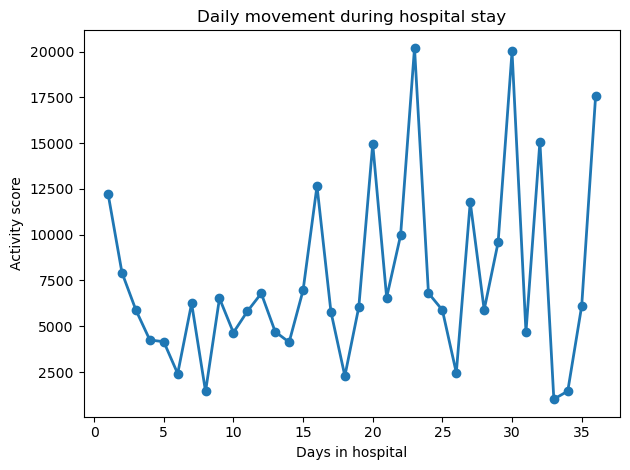

In [12]:
fig = plt.figure()
plt.plot(activity_df['days_in_hospital'], activity_df['daily_movement'],  lw=2, marker='o')
plt.xlabel('Days in hospital')
plt.ylabel('Activity score')
#plt.grid()
plt.title("Daily movement during hospital stay")
plt.tight_layout()
plt.show()

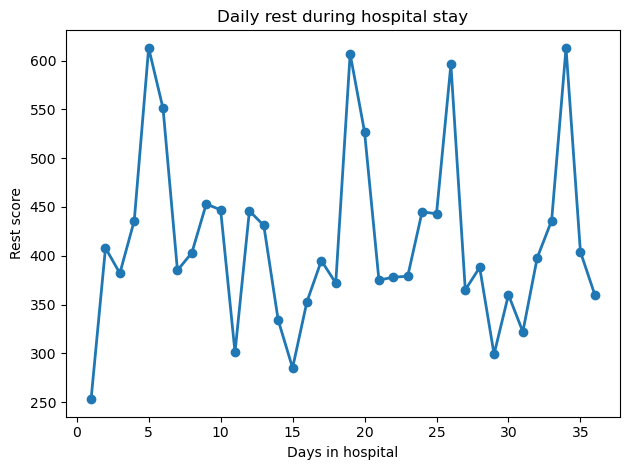

In [14]:
fig = plt.figure()

plt.plot(activity_df['days_in_hospital'], activity_df['rest'],  lw=2, marker='o')
#plt.plot(activity_df['Days in hospital'], activity_df['steps'],  lw=2, marker='s')
plt.xlabel('Days in hospital')
plt.ylabel('Rest score')
plt.title("Daily rest during hospital stay")
plt.tight_layout()
plt.show()

In [20]:
patient_df = pd.read_csv('Data/patients.csv')
patient_df['EHR-heartrate']=patient_df['EHR-heartrate'].astype(float)
patient_df['Oura-heartrate']=patient_df['Oura-heartrate'].astype(float)
patient_df

,PatientId,Heart Failure,Stage,EHR-heartrate,Oura-heartrate,Oura-high,Oura-low
0,1001,Right-sided CHF,Stage 1,95.0,98.0,108,90
1,1002,Biventricular CHF,Stage 3,99.0,110.0,120,101
2,1003,Right-sided CHF,Stage 2,124.0,118.0,124,116
3,1005,Right-sided CHF,Stage 3,88.0,94.0,99,84
4,1006,Systolic CHF,Stage 1,75.0,78.0,84,74
5,1007,Systolic CHF,Stage 3,101.0,96.0,101,91
6,1008,Diastolic CHF,Stage 1,63.0,70.0,75,65
7,1009,Right-sided CHF,Stage 3,71.0,76.0,84,74
8,1010,Systolic CHF,Stage 2,88.0,85.0,89,81
9,1011,Diastolic CHF,Stage 3,103.0,101.0,110,93


([<matplotlib.patches.Wedge at 0x7ff6737885e0>,
 [Text(0.6248711888047935, 0.9052822749848162, 'Right-sided CHF'),
  Text(-1.0680360276074794, 0.2632471153354504, 'Systolic CHF'),
  Text(-0.13259018705856618, -1.0919797810837775, 'Diastolic CHF'),
  Text(0.9740017147375195, -0.5111953243999517, 'Biventricular CHF')],
 [Text(0.3408388302571601, 0.4937903318098996, '30.8%\n4'),
  Text(-0.5825651059677159, 0.14358933563751838, '30.8%\n4'),
  Text(-0.07232192021376337, -0.5956253351366059, '23.1%\n3'),
  Text(0.5312736625841015, -0.27883381330906454, '15.4%\n2')])

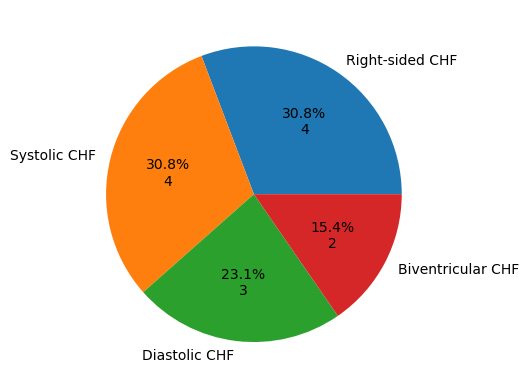

In [16]:
total = patient_df['Heart Failure'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(patient_df['Heart Failure'].value_counts().values, labels=patient_df['Heart Failure'].value_counts().index, autopct=fmt)


([<matplotlib.patches.Wedge at 0x7ff6737e8730>,
 [Text(0.3900653535244525, 1.0285178753817767, 'Stage 3'),
  Text(-1.0680359783135132, -0.2632473153289448, 'Stage 1'),
  Text(0.6248713583220699, -0.9052821579754742, 'Stage 2')],
 [Text(0.21276292010424677, 0.5610097502082418, '38.5%\n5'),
  Text(-0.582565079080098, -0.14358944472487897, '30.8%\n4'),
  Text(0.340838922721129, -0.49379026798662223, '30.8%\n4')])

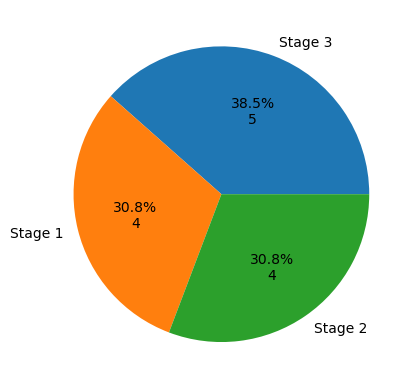

In [17]:
total = patient_df['Stage'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(patient_df['Stage'].value_counts().values, labels=patient_df['Stage'].value_counts().index, autopct=fmt)


In [30]:
sub_patients_df = patient_df[patient_df['Stage'] == 'Stage 3']
sub_patients_df = sub_patients_df[['PatientId','Oura-heartrate','Oura-high','Oura-low']]
sub_patients_df

,PatientId,Oura-heartrate,Oura-high,Oura-low
1,1002,110.0,120,101
3,1005,94.0,99,84
5,1007,96.0,101,91
7,1009,76.0,84,74
9,1011,101.0,110,93


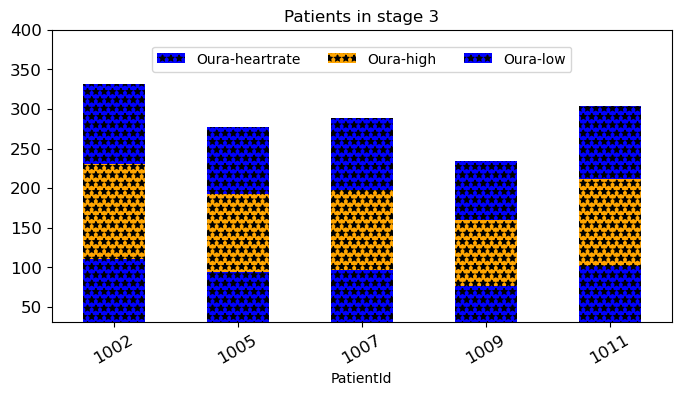

In [32]:
New_Colors = ['blue','orange']
plt.rcParams["figure.figsize"] = (8,3.8)
plt.rcParams['legend.loc'] = "upper center"
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=7)
# plot grouped bar chart
sub_patients_df.plot(x='PatientId',
        kind='bar',
        color=New_Colors,
        stacked = True,
        width = 0.5,hatch='**',
        ylim=[30,400],
        fontsize = 12,
        rot =30,
        title='Patients in stage 3').legend(bbox_to_anchor=[0.5,0.9], loc='center', ncol=4)

In [ ]:
p1 = plt.bar(ind, dataset[1], width, color='r')
p2 = plt.bar(ind, dataset[2], width, bottom=dataset[1], color='b')
p3 = plt.bar(ind, dataset[3], width,
             bottom=[sum(x) for x in zip(dataset[1],dataset[2])], color='g')
p4 = plt.bar(ind, dataset[4], width,
             bottom=[sum(x) for x in zip(dataset[1],dataset[2],dataset[3])],
             color='c')


In [34]:
with open('Data/oura_heartrate.json') as hr_file:
    data = json.load(hr_file)
    hr_df = pd.json_normalize(data['heart_rate'])
    print(hr_df)

         bpm quality  restorative source                 timestamp  \
0       86.0     bad        False  awake  2021-12-02T12:02:39.000Z   
1       79.0     bad        False  awake  2021-12-02T12:02:45.000Z   
2       75.0     bad        False  awake  2021-12-02T12:02:49.000Z   
3      106.0     bad        False  awake  2021-12-02T12:22:50.000Z   
4      108.0     bad        False  awake  2021-12-02T12:23:04.000Z   
...      ...     ...          ...    ...                       ...   
13194   68.0    good         True  awake  2022-01-07T13:04:35.000Z   
13195   73.0    good         True  awake  2022-01-07T13:05:07.000Z   
13196   74.0    good        False  awake  2022-01-07T13:09:48.000Z   
13197   75.0    good        False  awake  2022-01-07T13:09:53.000Z   
13198   77.0    good        False  awake  2022-01-07T13:09:56.000Z   

       timestamp_unix  
0       1638446559000  
1       1638446565000  
2       1638446569000  
3       1638447770000  
4       1638447784000  
...            

In [35]:
select_hr_df = hr_df[hr_df.quality == 'good']
select_hr_df = select_hr_df.reset_index(drop=True)

In [36]:
select_hr_df = select_hr_df[:1000]

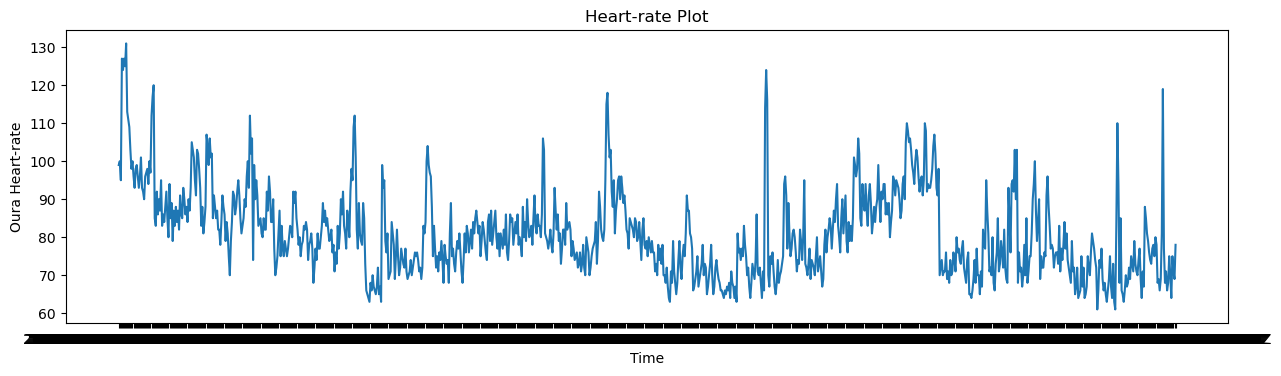

In [70]:
plt.rcParams["figure.figsize"] = (15,3.8)
plt.plot(select_hr_df['timestamp'], select_hr_df['bpm'])

# Add title and axis labels
plt.title('Heart-rate Plot')
plt.xlabel('Time')
plt.ylabel('Oura Heart-rate')
#plt.xticks(rotation=45)

# Display the plot
plt.show()

In [44]:
vitals_df = sleep_df[["hr_average","breath_average",'rmssd', 'temperature_delta']]
vitals_df = vitals_df.rename(columns={'hr_average': 'heart-rate', 'rmssd': 'heart-rate-variability', 'breath_average':'respiratory_rate'})
vitals_df

,heart-rate,respiratory_rate,heart-rate-variability,temperature_delta
0,63.91,14.125,28,-0.24
1,62.64,14.375,33,-0.05
2,69.69,14.500,26,-0.05
3,74.52,14.750,25,0.19
4,76.29,15.250,27,-0.12
5,63.40,14.375,34,-0.23
6,65.88,14.875,28,-0.04
7,64.91,14.375,29,-0.28
8,59.40,13.875,42,-0.52
9,59.31,13.875,35,-0.46


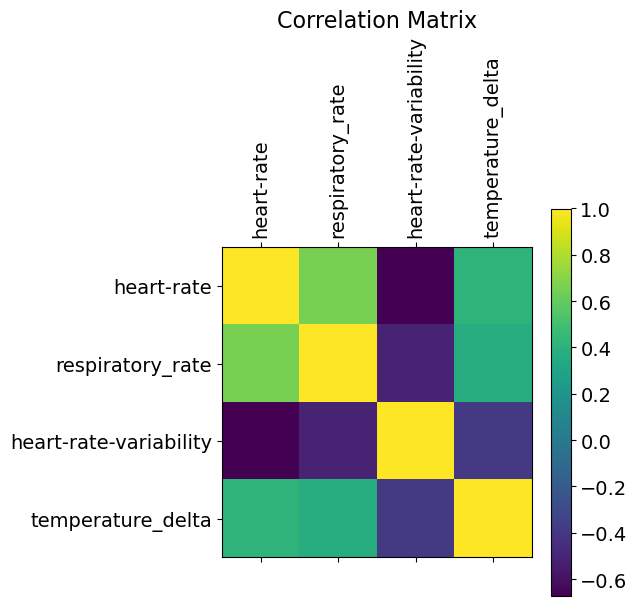

In [46]:
f = plt.figure(figsize=(5, 5))
plt.matshow(vitals_df.corr(), fignum=f.number)
plt.xticks(range(vitals_df.select_dtypes(['number']).shape[1]), vitals_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(vitals_df.select_dtypes(['number']).shape[1]), vitals_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [51]:

df= pd.read_csv('Data/1001/heartrate-1001.csv')
df['EHR-heartrate']=df['EHR-heartrate'].astype(float)
df['Oura-heartrate']=df['Oura-heartrate'].astype(float)
df = df.set_index('Time')
df

,Date,EHR-heartrate,Oura-heartrate,EHR-hrv,Oura-hrv
Time,,,,,
9:00 AM,1-16-2024,95.0,98.0,33,38
1:00 PM,1-16-2024,99.0,110.0,27,25
5:00 PM,1-16-2024,124.0,118.0,25,21
9:00 PM,1-16-2024,88.0,94.0,19,23


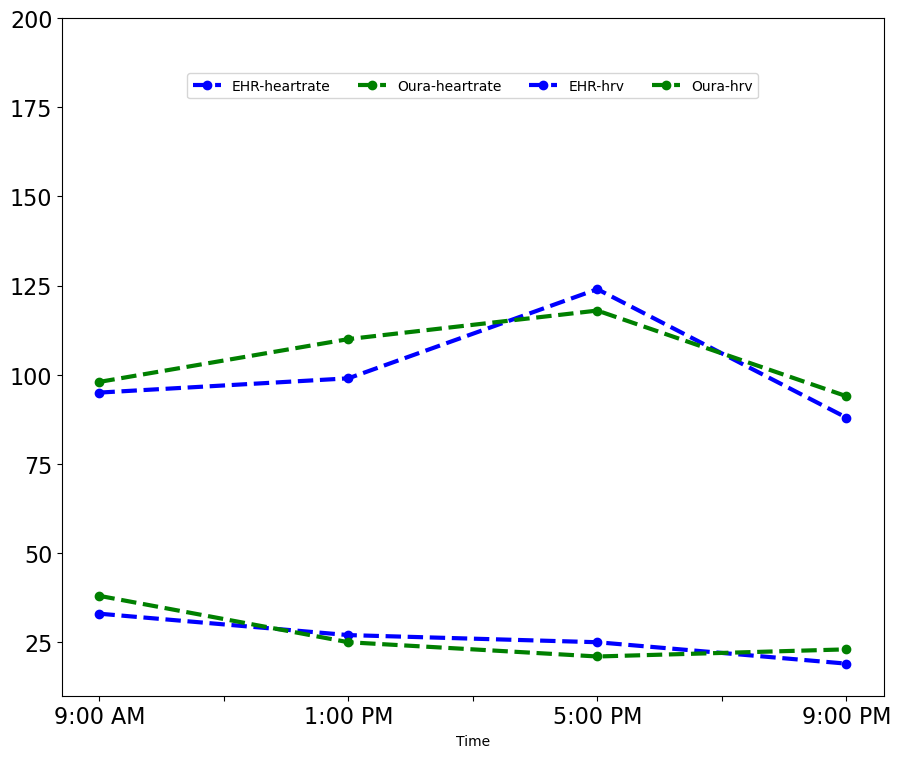

In [59]:

df.plot.line(color = ['b','g'], ylim=[10,200], fontsize = 16, marker = 'o', linestyle = 'dashed', linewidth = 3,
             figsize = (10.6,8.8)).legend(bbox_to_anchor=[0.5,0.9], loc='center', ncol=4)
#plt.legend(loc='lower left')
plt.show()

In [60]:
df= pd.read_csv('Data/1001/temperature-1001.csv')
df['EHR-temperature']=df['EHR-temperature'].astype(float)
df['Oura-temperature']=df['Oura-temperature'].astype(float)
df = df.set_index('Time')
df

,Date,EHR-temperature,Oura-temperature
Time,,,
9:00 AM,1-16-2024,98.4,98.0
1:00 PM,1-16-2024,99.0,100.1
5:00 PM,1-16-2024,101.5,101.9
9:00 PM,1-16-2024,102.6,102.0


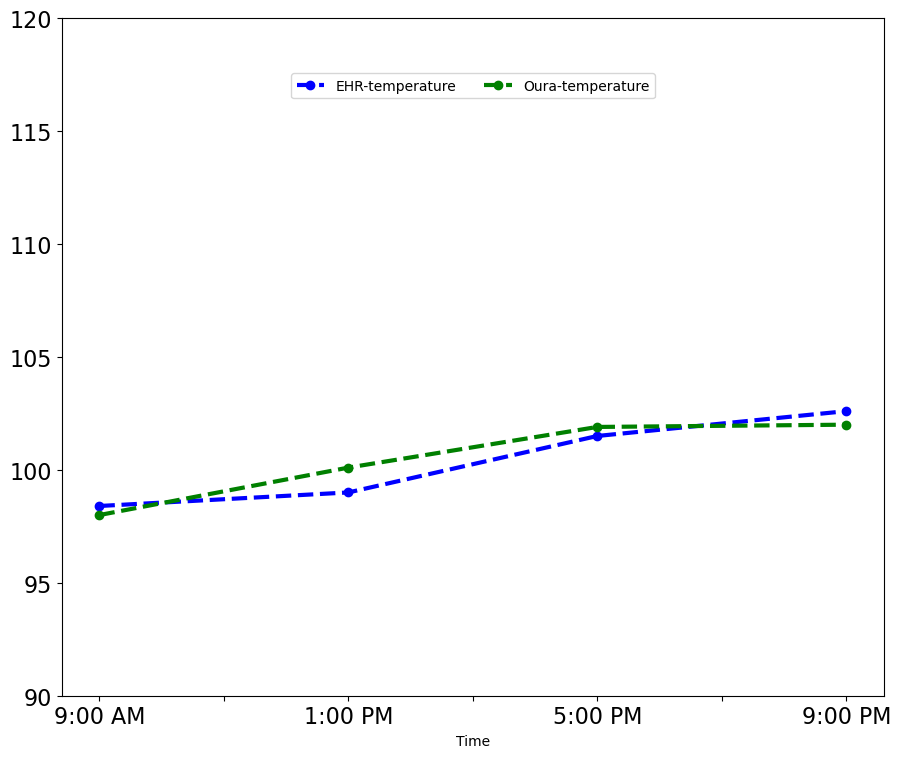

In [62]:

df.plot.line(color = ['b','g'], ylim=[90,120], fontsize = 16, marker = 'o', linestyle = 'dashed', linewidth = 3,
             figsize = (10.6,8.8)).legend(bbox_to_anchor=[0.5,0.9], loc='center', ncol=4)
#plt.legend(loc='lower left')
plt.show()

In [64]:
df= pd.read_csv('Data/1001/daily-heartrate-1001.csv')
df['EHR-heartrate']=df['EHR-heartrate'].astype(float)
df['Oura-heartrate']=df['Oura-heartrate'].astype(float)
df

,Date,EHR-heartrate,Oura-heartrate,EHR-hrv,Oura-hrv
0,1-16-2024,95.0,98.0,13.5,NaN
1,1-17-2024,99.0,110.0,15.3,NaN
2,1-18-2024,124.0,118.0,NaN,NaN
3,1-19-2024,88.0,94.0,NaN,NaN
4,1-20-2024,75.0,78.0,NaN,NaN


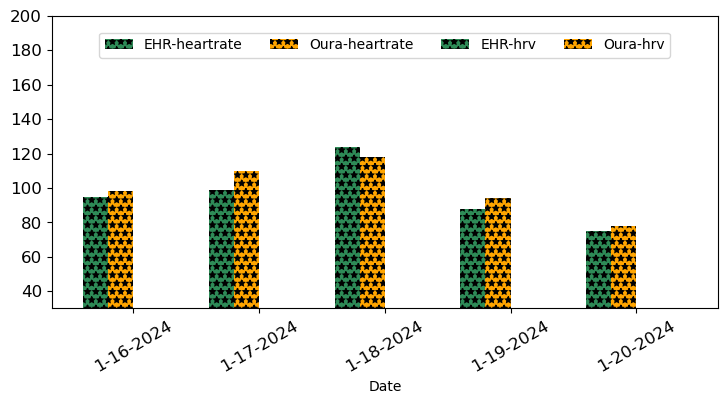

In [67]:
New_Colors = ['seagreen','orange']
plt.rcParams["figure.figsize"] = (8.6,3.8)
plt.rcParams['legend.loc'] = "upper center"
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=7)
# plot grouped bar chart
df.plot(x='Date',
        kind='bar',
        color=New_Colors,
        width = 0.8,hatch='**',
        ylim=[30,200],
        fontsize = 12,
        rot =30,
        stacked=False,
        title='').legend(bbox_to_anchor=[0.5,0.9], loc='center', ncol=4)

In [ ]:
#Oura sleep contributors=: Total sleep, REM sleep, Deep Sleep, Restfulness
#Oura Activity (High, Medium, Low) = Stay active, Move everyhour,
#Oura dailymovement = (High, Medium, Low)
#Heart-rate
#HRV = By days